# Coursework 2 - ECMM445 Learning from Data (MSc only) 

### Enter your candidate number here:

## Task 1

In [1]:
import pandas as pd
dia_test = pd.read_csv("task1_diabetes.txt")
dia_test.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [21]:
import numpy as np
X=dia_test.iloc[:,:-1]  
Y=dia_test.iloc[:,-1:]
y=[]
Y=np.array(Y)
for each in Y:
    if each == "tested_positive":
        y.append(1)
    else:
        y.append(0)     
X=np.array(X)
y=np.array(y)
y=y.flatten()

In [22]:
import random
from scipy.spatial import  distance

def distance_cw2(x, y):
    #a=int(x.shape)
    resultlist=random.sample(range(0,8),3)
    x=x.take(resultlist)
    y=y.take(resultlist)   
    b=(x[0]-y[0])**2+(x[1]-y[1])**2+(x[2]-y[2])**2
    b=np.sqrt(b)
    return b

In [23]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Knc=[1,3,5,7]

Self_acc_mean=[]
Self_acc_std=[]
Eucli_acc_mean=[]
Eucli_acc_std=[]
Manha_acc_mean=[]
Manha_acc_std=[]
Cheby_acc_mean=[]
Cheby_acc_std=[]
 
      
for k in Knc:
    
    Self_acc_scores = []
    Eucli_acc_scores = []
    Manha_acc_scores = []
    Cheby_acc_scores = []
   
    
    kf = KFold(n_splits=10)
    kf.get_n_splits(X)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        scaler = StandardScaler()
        # train the scaler on training data only
        scaler.fit(X_train)
        # scale training data
        X_train = scaler.transform(X_train)
        # scale test data
        X_test = scaler.transform(X_test)
        

        knn = KNeighborsClassifier(metric=distance_cw2,n_neighbors=k)
        knn.fit(X_train, y_train)
        yte = knn.predict(X_test)
        Self_acc_scores .append(accuracy_score(y_test, yte))
        print("distance_cw2 accuracy: " + str(Self_acc_scores [- 1]))

        knn = KNeighborsClassifier(metric="euclidean",n_neighbors=k)
        knn.fit(X_train, y_train)
        yte = knn.predict(X_test)
        Eucli_acc_scores.append(accuracy_score(y_test, yte))
        print("Euclidean accuracy: " + str(Eucli_acc_scores[- 1]))
       
        knn = KNeighborsClassifier(metric="manhattan",n_neighbors=k)
        knn.fit(X_train, y_train)
        yte = knn.predict(X_test)
        Manha_acc_scores.append(accuracy_score(y_test, yte))
        print("Manhattan accuracy: " + str(Manha_acc_scores[- 1]))
        
        knn = KNeighborsClassifier(metric="chebyshev",n_neighbors=k)
        knn.fit(X_train, y_train)
        yte = knn.predict(X_test)
        Cheby_acc_scores.append(accuracy_score(y_test, yte))
        print("Chebyshev accuracy: " + str(Cheby_acc_scores[- 1]))
        print("\n")
    
    
    Self_mean=np.mean(Self_acc_scores)
    Self_std=np.std(Self_acc_scores)
    Eucli_mean=np.mean(Eucli_acc_scores)
    Eucli_std= np.std(Eucli_acc_scores)
    Manha_mean=np.mean(Manha_acc_scores)
    Manha_std=np.std(Manha_acc_scores)
    Cheby_mean=np.mean(Cheby_acc_scores)
    Cheby_std=np.std(Cheby_acc_scores)
    
    print("the average of the distance_cw2 accuracy is ",  Self_mean)
    print("the standard deviation of the distance_cw2 accuracy is ",  Self_std)
    print("the average of the Euclidean accuracy is ", Eucli_mean  )
    print("the standard deviation of the Euclidean accuracy is ", Eucli_std)
    print("the average of the Manhattan accuracy is ", Manha_mean )
    print("the standard deviation of the Manhattan accuracy is ", Manha_std)
    print("the average of the Chebyshev accuracy is ", Cheby_mean )
    print("the standard deviation of the Chebyshev accuracy is ", Cheby_std )
    print("\n")
    Self_acc_mean.append(Self_mean)
    Self_acc_std.append(Self_std)
    Eucli_acc_mean.append(Eucli_mean)
    Eucli_acc_std.append(Eucli_std)
    Manha_acc_mean.append(Manha_mean)
    Manha_acc_std.append(Manha_std)
    Cheby_acc_mean.append(Cheby_mean)
    Cheby_acc_std.append(Cheby_std)
    

distance_cw2 accuracy: 0.5584415584415584
Euclidean accuracy: 0.6233766233766234
Manhattan accuracy: 0.6493506493506493
Chebyshev accuracy: 0.6233766233766234


distance_cw2 accuracy: 0.6493506493506493
Euclidean accuracy: 0.8051948051948052
Manhattan accuracy: 0.7662337662337663
Chebyshev accuracy: 0.7922077922077922


distance_cw2 accuracy: 0.6623376623376623
Euclidean accuracy: 0.6363636363636364
Manhattan accuracy: 0.6493506493506493
Chebyshev accuracy: 0.6103896103896104


distance_cw2 accuracy: 0.6233766233766234
Euclidean accuracy: 0.7272727272727273
Manhattan accuracy: 0.6493506493506493
Chebyshev accuracy: 0.6883116883116883


distance_cw2 accuracy: 0.6623376623376623
Euclidean accuracy: 0.6883116883116883
Manhattan accuracy: 0.7012987012987013
Chebyshev accuracy: 0.7532467532467533


distance_cw2 accuracy: 0.6623376623376623
Euclidean accuracy: 0.7142857142857143
Manhattan accuracy: 0.7012987012987013
Chebyshev accuracy: 0.6753246753246753


distance_cw2 accuracy: 0.623376623

In [12]:
import matplotlib.pyplot as plt

import numpy as np



X = [1,3,5,7]

Y1 =Self_acc_mean
Y2=Self_acc_std
Y3=Eucli_acc_mean
Y4=Eucli_acc_std
Y5=Manha_acc_mean
Y6=Manha_acc_std
Y7=Cheby_acc_mean
Y8=Cheby_acc_std


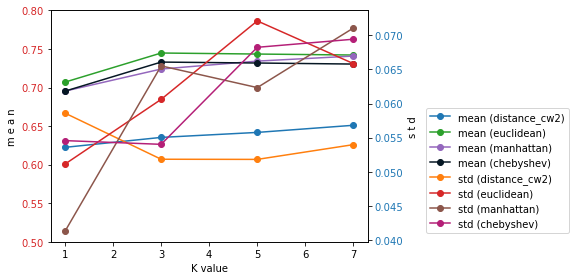

In [13]:
fig, ax1 = plt.subplots()
ax1.set_xlabel("K value")
color='tab:red'
ax1.set_ylabel("m e a n")
p1,=ax1.plot(X, Y1,marker="o" ,color='#1f77b4',label="mean (distance_cw2)")
p2,=ax1.plot(X, Y3,marker="o" ,color='#2ca02c',label="mean (euclidean)")
p3,=ax1.plot(X, Y5,marker="o" ,color='#9467bd',label="mean (manhattan)")
p4,=ax1.plot(X, Y7,marker="o" ,color='#061724',label="mean (chebyshev)")
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0.5,0.8)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('s t d')  # we already handled the x-label with ax1
p5,=ax2.plot(X, Y2, marker="o" ,color='#ff7f0e',label="std (distance_cw2)")
p6,=ax2.plot(X, Y4, marker="o" ,color='#d62728',label="std (euclidean)")
p7,=ax2.plot(X, Y6, marker="o" ,color='#8c564b',label="std (manhattan)")
p8,=ax2.plot(X, Y8, marker="o" ,color='#b41f77',label="std (chebyshev)")
ax2.tick_params(axis='y', labelcolor=color)

lines = [p1, p2, p3, p4, p5 ,p6, p7, p8]

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.legend(lines, [l.get_label() for l in lines],loc='best', bbox_to_anchor=(1.15, 0., 0.5, 0.6))
plt.show()

In [14]:
from prettytable import PrettyTable

columns_1=[]
columns_2=[]
columns_3=[]
columns_4=[]

columns_1.append(Self_acc_mean[0])
columns_1.append(Self_acc_std[0])
columns_1.append(Eucli_acc_mean[0])
columns_1.append(Eucli_acc_std[0])
columns_1.append(Manha_acc_mean[0])
columns_1.append(Manha_acc_std[0])
columns_1.append(Cheby_acc_mean[0])
columns_1.append(Cheby_acc_std[0])

columns_2.append(Self_acc_mean[1])
columns_2.append(Self_acc_std[1])
columns_2.append(Eucli_acc_mean[1])
columns_2.append(Eucli_acc_std[1])
columns_2.append(Manha_acc_mean[1])
columns_2.append(Manha_acc_std[1])
columns_2.append(Cheby_acc_mean[1])
columns_2.append(Cheby_acc_std[1])

columns_3.append(Self_acc_mean[2])
columns_3.append(Self_acc_std[2])
columns_3.append(Eucli_acc_mean[2])
columns_3.append(Eucli_acc_std[2])
columns_3.append(Manha_acc_mean[2])
columns_3.append(Manha_acc_std[2])
columns_3.append(Cheby_acc_mean[2])
columns_3.append(Cheby_acc_std[2])

columns_4.append(Self_acc_mean[3])
columns_4.append(Self_acc_std[3])
columns_4.append(Eucli_acc_mean[3])
columns_4.append(Eucli_acc_std[3])
columns_4.append(Manha_acc_mean[3])
columns_4.append(Manha_acc_std[3])
columns_4.append(Cheby_acc_mean[3])
columns_4.append(Cheby_acc_std[3])

    
table=PrettyTable()
table.add_column("the value of the K",["mean of distance_cw2","std of distance_cw2","mean of euclidean",
                  "std of euclidean","mean of manhattan","std of manhattan","mean of chebyshev","std of chebyshev"])
table.add_column("K=1",columns_1)
table.add_column("K=3",columns_2)
table.add_column("K=5",columns_3)
table.add_column("K=7",columns_4)


print(table)


+----------------------+----------------------+---------------------+---------------------+---------------------+
|  the value of the K  |         K=1          |         K=3         |         K=5         |         K=7         |
+----------------------+----------------------+---------------------+---------------------+---------------------+
| mean of distance_cw2 |  0.622453861927546   |  0.6353383458646615 |  0.6418147641831852 |  0.6510594668489406 |
| std of distance_cw2  | 0.05859600733353641  | 0.05183663448293436 | 0.05181412217508741 | 0.05397748489206752 |
|  mean of euclidean   |  0.7070232399179768  |  0.7447539302802462 |  0.743421052631579  |  0.7421394395078604 |
|   std of euclidean   | 0.051125195144482875 | 0.06061173739381853 | 0.07210753266313592 | 0.06585087369270491 |
|  mean of manhattan   |  0.695369104579631   |  0.7239917976760082 |  0.7342617908407382 |  0.7408065618591934 |
|   std of manhattan   | 0.04127889454450633  |  0.0655169542803491 | 0.0623377208908660

   ## Taks 2
   

In [1]:
import pandas as pd
import numpy as np
data_train = pd.read_csv("task2_train.txt")
X_train=data_train.iloc[:,:-1]
Y_train=data_train.iloc[:,-1:]
np.array(X_train)
Y_train=np.array(Y_train)
Y_train=Y_train.flatten()
Y_train_copy=Y_train

In [2]:
data_test = pd.read_csv("task2_test.txt")
X_test=data_test.iloc[:,:-1]
Y_test=data_test.iloc[:,-1:]
X_test=np.array(X_test)
Y_test=np.array(Y_test)

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# train the scaler on training data only
scaler.fit(X_train)
# scale training data
X_train = scaler.transform(X_train)
# scale test data
X_test = scaler.transform(X_test)

In [7]:
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore') 


Knn_ave=[]
DT_ave=[]
NN_ave=[]
for i in range(0,16):
    Knn_ave.append(0)
    DT_ave.append(0)
    NN_ave.append(0)

for time in range(0,50):
    

    noise_level=0
    Knn_acc=[]
    DT_acc=[]
    NN_acc=[]
    for nl in range(0,17):
        
        Y_train=Y_train_copy
        noise_level= nl * 0.02
        totalNum = Y_train.shape[0]
        corruptedIdxList=random.sample(range(0,totalNum),int(noise_level*totalNum))
        for cIdx in corruptedIdxList:
            #print("former",Y_train[cIdx])
            if Y_train[cIdx]==1:
                   Y_train[cIdx]=0
            else:
                Y_train[cIdx]=1
            #print("later",Y_train[cIdx],"\n")
            
        #print(noise_level,   int(noise_level*totalNum),  "\n")    
        # KNN
        knn = KNeighborsClassifier(n_neighbors=5,weights="distance")
        knn.fit(X_train, Y_train)
        yte = knn.predict(X_test)
        #print(noise_level,  accuracy_score(Y_test, yte),  "\n") 
        Knn_acc.append(accuracy_score(Y_test, yte))
        
        #DT
        classifier_model = DecisionTreeClassifier(random_state=1234)
        classifier_model = classifier_model.fit(X_train, Y_train)
        preds = classifier_model.predict(X_test)
        DT_acc.append(accuracy_score(Y_test, preds))
        
        #NN
        
        clf = MLPClassifier(hidden_layer_sizes=(8,3),random_state=333)
        clf.fit(X_train,Y_train)
        acc=accuracy_score(clf.predict(X_test),Y_test)
        NN_acc.append(acc)
        
    #print(Knn_acc , "\n")
    for i in range(0,16):
        Knn_ave[i]=Knn_ave[i]+Knn_acc[i]
        DT_ave[i]=DT_ave[i]+DT_acc[i]
        NN_ave[i]=NN_ave[i]+NN_acc[i]
Knn_ave=np.array(Knn_ave)/50
DT_ave=np.array(DT_ave)/50
NN_ave=np.array(NN_ave)/50
print(Knn_ave) 
print(DT_ave)  
print(NN_ave) 


[0.50169492 0.50237288 0.50813559 0.50372881 0.50610169 0.51084746
 0.50271186 0.50101695 0.5        0.50101695 0.49525424 0.50135593
 0.50576271 0.50305085 0.4979661  0.50508475]
[0.48813559 0.49559322 0.49423729 0.50847458 0.50474576 0.50847458
 0.5        0.51220339 0.50542373 0.48847458 0.50101695 0.52101695
 0.51661017 0.50474576 0.49220339 0.51389831]
[0.51932203 0.51322034 0.52033898 0.51661017 0.50881356 0.52237288
 0.52237288 0.53254237 0.52949153 0.54101695 0.51864407 0.53050847
 0.52610169 0.50881356 0.53220339 0.52745763]


In [8]:
import matplotlib.pyplot as plt

import numpy as np



X = ["0","2%","4%","6%","8%","10%","12%",
     "14%","16%","18%","20%","22%","24%","26%","28%","30%"]


Y1 =Knn_ave
Y2=DT_ave
Y3=NN_ave

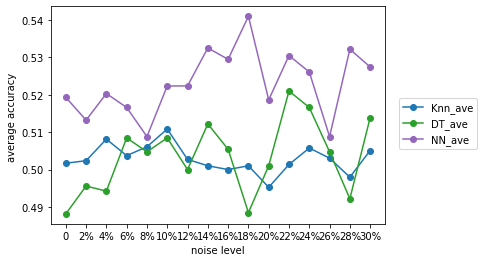

In [9]:
fig, ax1 = plt.subplots()
ax1.set_xlabel("noise level")

ax1.set_ylabel("average accuracy ")
p1,=ax1.plot(X, Y1,marker="o" ,color='#1f77b4',label="Knn_ave")
p2,=ax1.plot(X, Y2,marker="o" ,color='#2ca02c',label="DT_ave")
p3,=ax1.plot(X, Y3,marker="o" ,color='#9467bd',label="NN_ave")

#ax1.set_ylim(0.5,0.8)


lines = [p1, p2, p3]

plt.legend(lines, [l.get_label() for l in lines],loc='best', bbox_to_anchor=(0.79, 0., 0.5, 0.6))

plt.show()

   ## Taks 3 [Justification]

Task 1

The accuracy score of the self-defined function "distance_cw2" lower obviously than the Euclidean function, it reasonable, because we just use three value to calculate the distance, the Euclidean function uses 8 value in this experiment. As the value of the K increasing, the accuracy score is rising, and it seems like each function has its best suitable K value. The performance of the three built-in functions is similar, it hard to compare, which is best as the resulting change every time I run the programme. Recommend: increase the size of the dataset.


Task 2

NN has the highest level of accuracy score during the above three algorithms when there are no noisy. And adding noise to inputs randomly have little influence on Neural Network, it has a remarkable performance. So, NN has a high level of robustness and can keep a high performance. But, we have to admit, it cost more time to finish the train compare with the others.

KNN: Noisy make an obvious impact on Knn, I did 100 times experiment to test, the accuracy score of the KNN decreases following the increase of the value of noisy. So, when handling the dataset with noisy, Knn is a bad choice.

DT: Decision Tree has the lowest number when there are no noisy; we already know it depends on the features of data to split data, so, the result prone to show wave.

Comparing them, I prefer to use NN to handle data, no matter there are noisy or not.

The new point, we still know standardization do not influence Decision Tree after we finished the last coursework, but, during this experiment, I find it can prove the performance of Knn and NN.